# Salary trends in AI, ML, Data around the world from 2020-2023

Helping those interested in the field of Data Science 

---





*   Get an overview of the changes in this field from 2020 to the present.
*   Capture the trend of working and salary between industries going on in the world.
*  Provide a lot of useful information to give directions on future work.










In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/salaries.csv')

In [77]:
# Display the first few rows of the dataset
print(df.head())


   work_year experience_level employment_type           job_title  salary  \
0       2023               MI              FT  AWS Data Architect  258000   
1       2023               SE              FT      Data Scientist  225000   
2       2023               SE              FT      Data Scientist  156400   
3       2023               SE              FT       Data Engineer  190000   
4       2023               SE              FT       Data Engineer  150000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         258000                 US           100   
1             USD         225000                 US             0   
2             USD         156400                 US             0   
3             USD         190000                 US           100   
4             USD         150000                 US           100   

  company_location company_size  
0               US            L  
1               US            M  
2               US  

In [78]:
# Get general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4134 non-null   int64 
 1   experience_level    4134 non-null   object
 2   employment_type     4134 non-null   object
 3   job_title           4134 non-null   object
 4   salary              4134 non-null   int64 
 5   salary_currency     4134 non-null   object
 6   salary_in_usd       4134 non-null   int64 
 7   employee_residence  4134 non-null   object
 8   remote_ratio        4134 non-null   int64 
 9   company_location    4134 non-null   object
 10  company_size        4134 non-null   object
dtypes: int64(4), object(7)
memory usage: 355.4+ KB
None


In [79]:
# Summary statistics of numeric columns
print(df.describe())


         work_year        salary  salary_in_usd  remote_ratio
count  4134.000000  4.134000e+03    4134.000000   4134.000000
mean   2022.428882  1.894287e+05  139416.264393     45.936139
std       0.684520  6.460075e+05   63605.472000     48.624255
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   96817.000000      0.000000
50%    2023.000000  1.400000e+05  136000.000000      0.000000
75%    2023.000000  1.833100e+05  179820.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [80]:
#sum of dublicate data
df.duplicated().sum()

1333

This code calculates and generates a summary table that provides information about the variables in the DataFrame

In [81]:
missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))
    
output = pd.DataFrame({
    'variable': variables, 
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})   
output.sort_values("missing",ascending=False).reset_index(drop=True)

,variable,dtype,count,unique,missing
0,work_year,int64,4134,4,0
1,experience_level,object,4134,4,0
2,employment_type,object,4134,4,0
3,job_title,object,4134,99,0
4,salary,int64,4134,859,0
5,salary_currency,object,4134,22,0
6,salary_in_usd,int64,4134,1088,0
7,employee_residence,object,4134,80,0
8,remote_ratio,int64,4134,3,0
9,company_location,object,4134,74,0


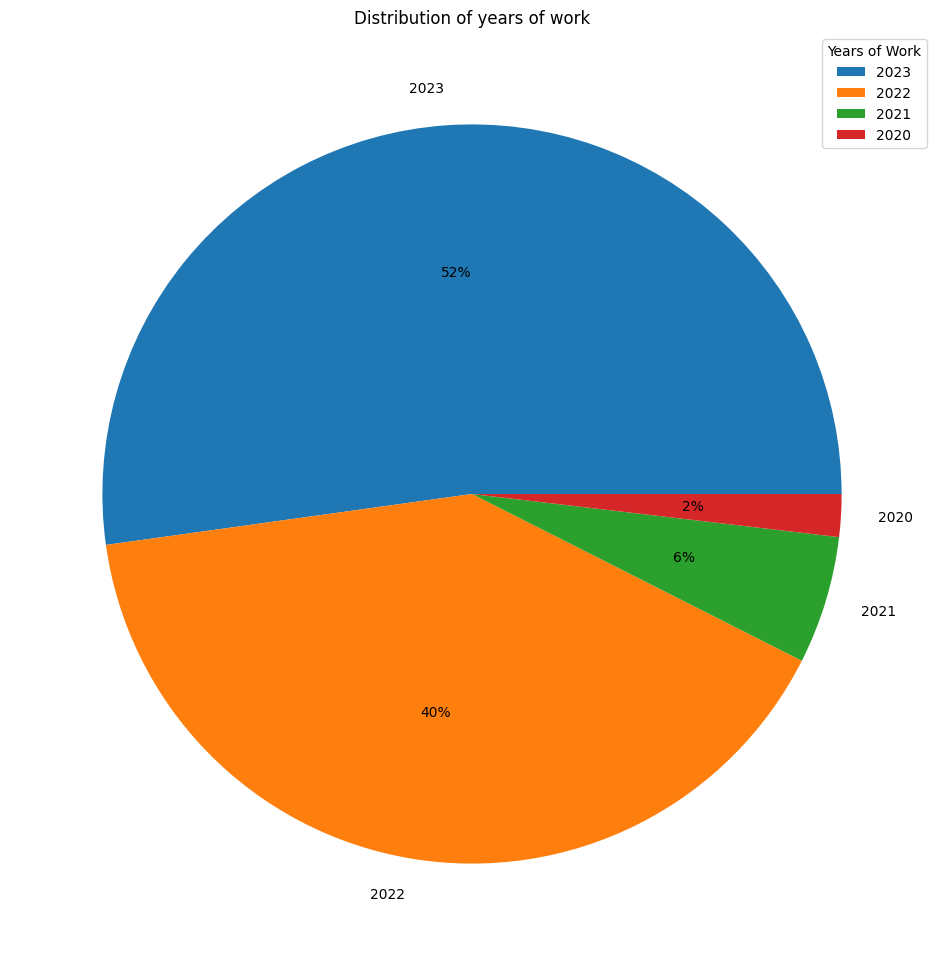

In [82]:
work_year_values = df['work_year'].value_counts()
plt.figure(figsize=(15, 12))
plt.pie(work_year_values, labels=work_year_values.index, autopct='%.0f%%')
plt.title("Distribution of years of work")
plt.legend(title="Years of Work", loc="upper right")
plt.show()


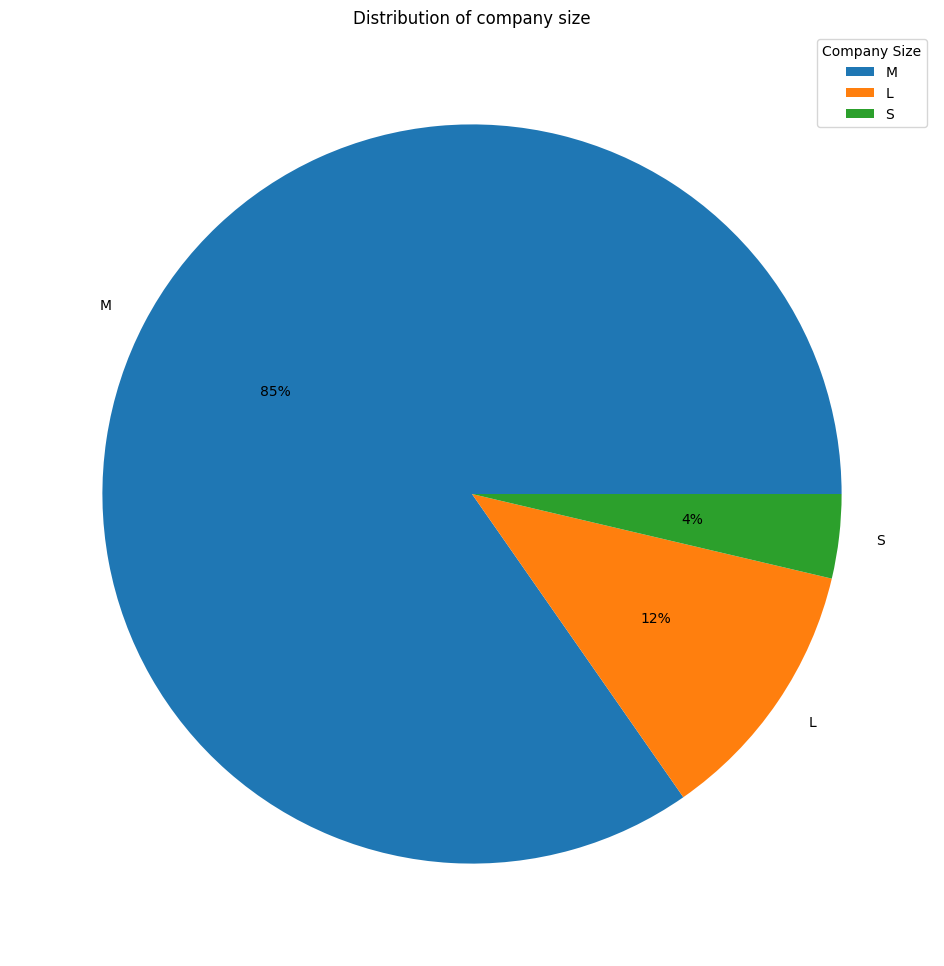

In [83]:
company_size_values = df['company_size'].value_counts()
plt.figure(figsize=(15, 12))
plt.pie(company_size_values, labels=company_size_values.index, autopct='%.0f%%')
plt.title("Distribution of company size")
plt.legend(title="Company Size", loc="upper right")
plt.show()


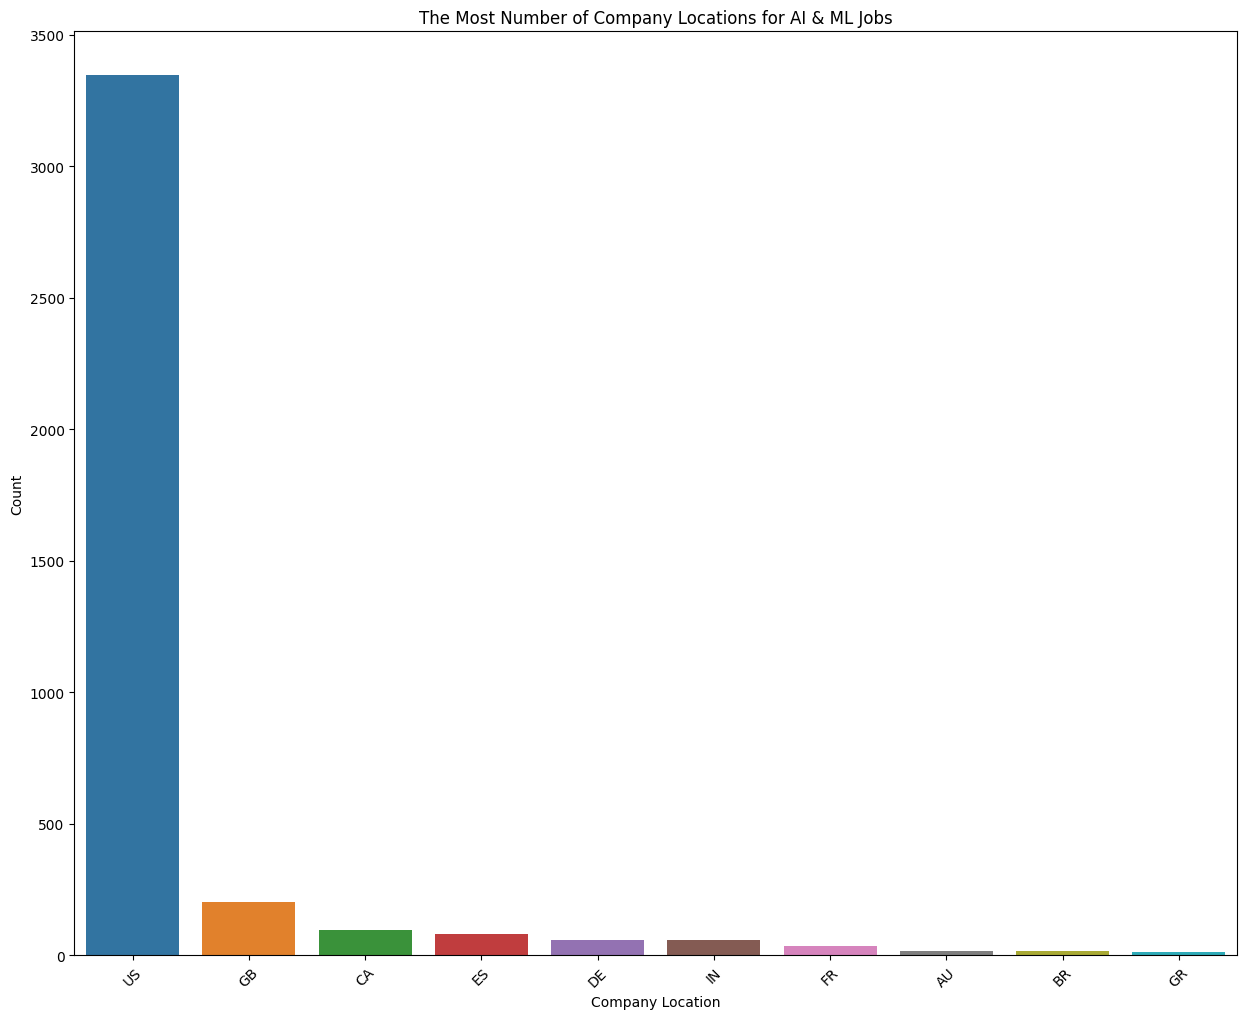

In [84]:
top_10_locations = df['company_location'].value_counts().head(10)
plt.figure(figsize=(15, 12))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.title('The Most Number of Company Locations for AI & ML Jobs')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


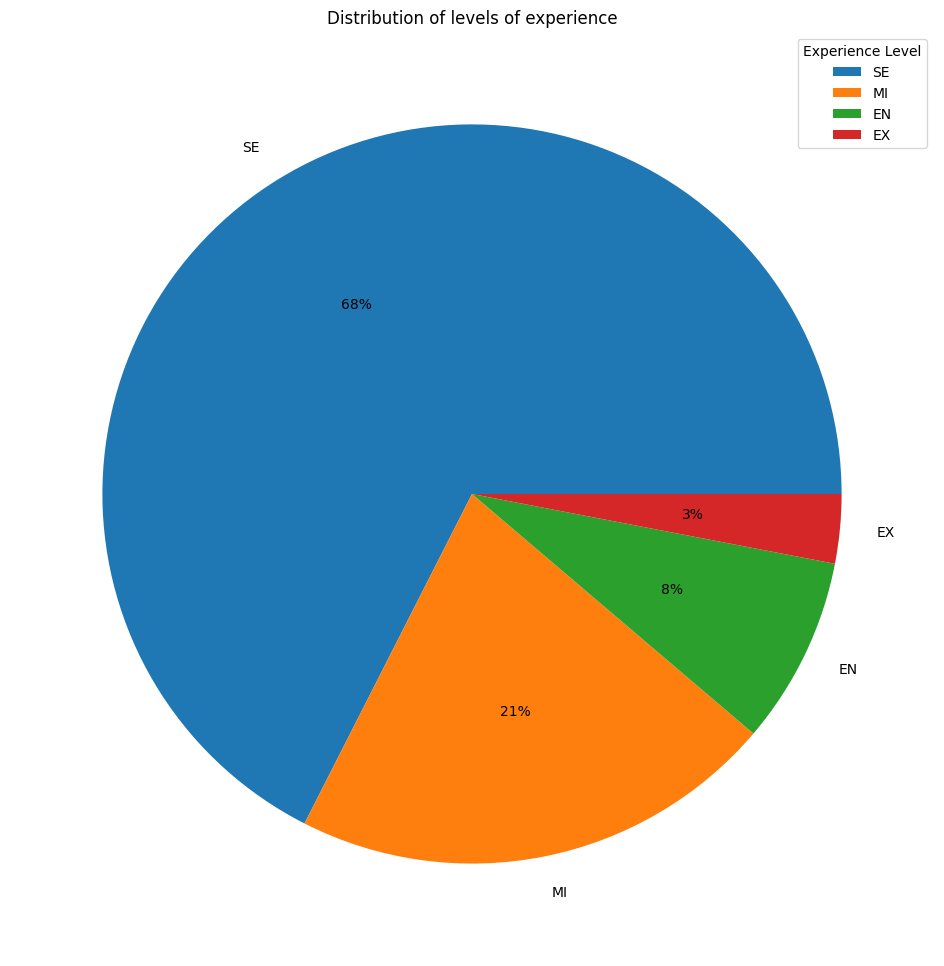

In [85]:
work_year_values = df['experience_level'].value_counts()

plt.figure(figsize=(15, 12))
plt.pie(work_year_values, labels=work_year_values.index, autopct='%.0f%%')
plt.title("Distribution of levels of experience")
plt.legend(title="Experience Level", loc="upper right")
plt.show()


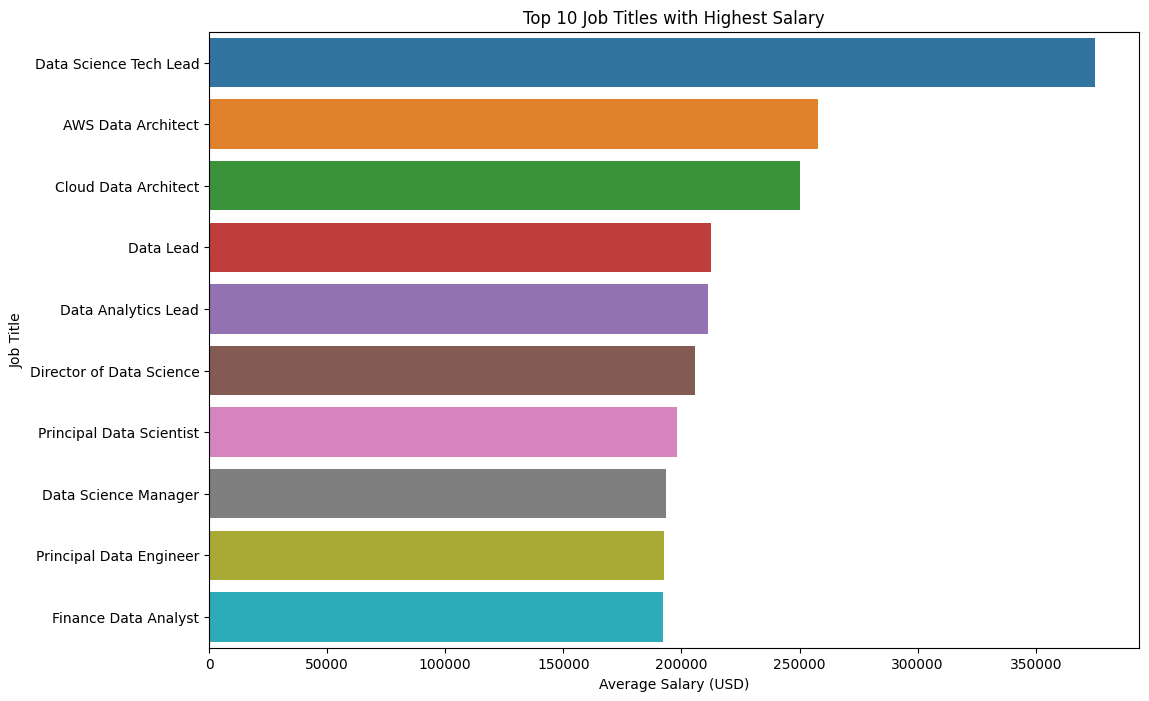

In [86]:
top_10_job_titles = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_job_titles.values, y=top_10_job_titles.index)
plt.title('Top 10 Job Titles with Highest Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()


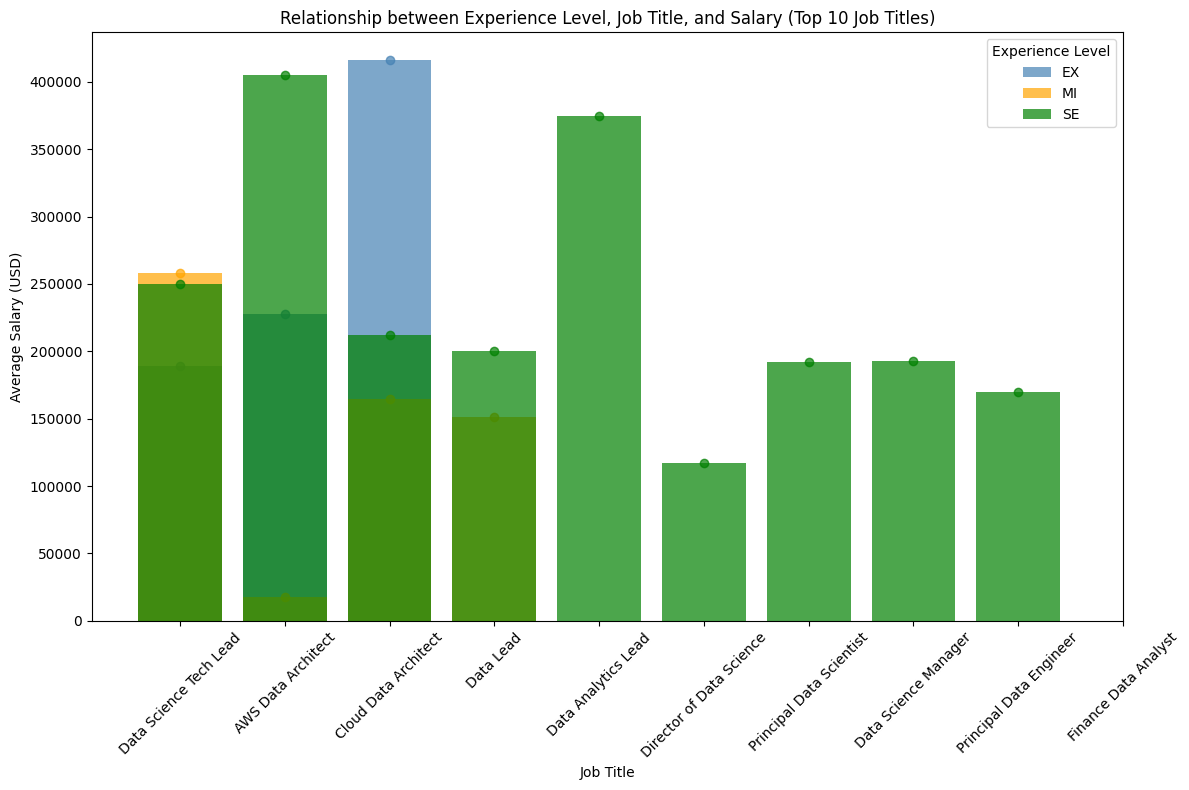

In [87]:
import numpy as np

# Filter the data for the top 10 job titles with the highest average salary
top_10_job_titles = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
filtered_data = df[df['job_title'].isin(top_10_job_titles.index)]

# Group the filtered data by experience_level and job_title, and calculate the average salary
grouped_data = filtered_data.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()

 
fig, ax = plt.subplots(figsize=(12, 8))

 
colors = ['steelblue', 'orange', 'green', 'red']

 
for i, exp_level in enumerate(grouped_data['experience_level'].unique()):
 
    exp_data = grouped_data[grouped_data['experience_level'] == exp_level]
 
    x = np.arange(len(exp_data))
 
    ax.bar(x, exp_data['salary_in_usd'], color=colors[i], alpha=0.7, label=exp_level)
 
    ax.scatter(x, exp_data['salary_in_usd'], color=colors[i], alpha=0.7)
    
 
ax.set_xticks(np.arange(len(top_10_job_titles)))
ax.set_xticklabels(top_10_job_titles.index, rotation=45)

 
ax.set_xlabel('Job Title')
ax.set_ylabel('Average Salary (USD)')
ax.set_title('Relationship between Experience Level, Job Title, and Salary (Top 10 Job Titles)')
 
ax.legend(title='Experience Level')
 
plt.tight_layout()
 
plt.show()


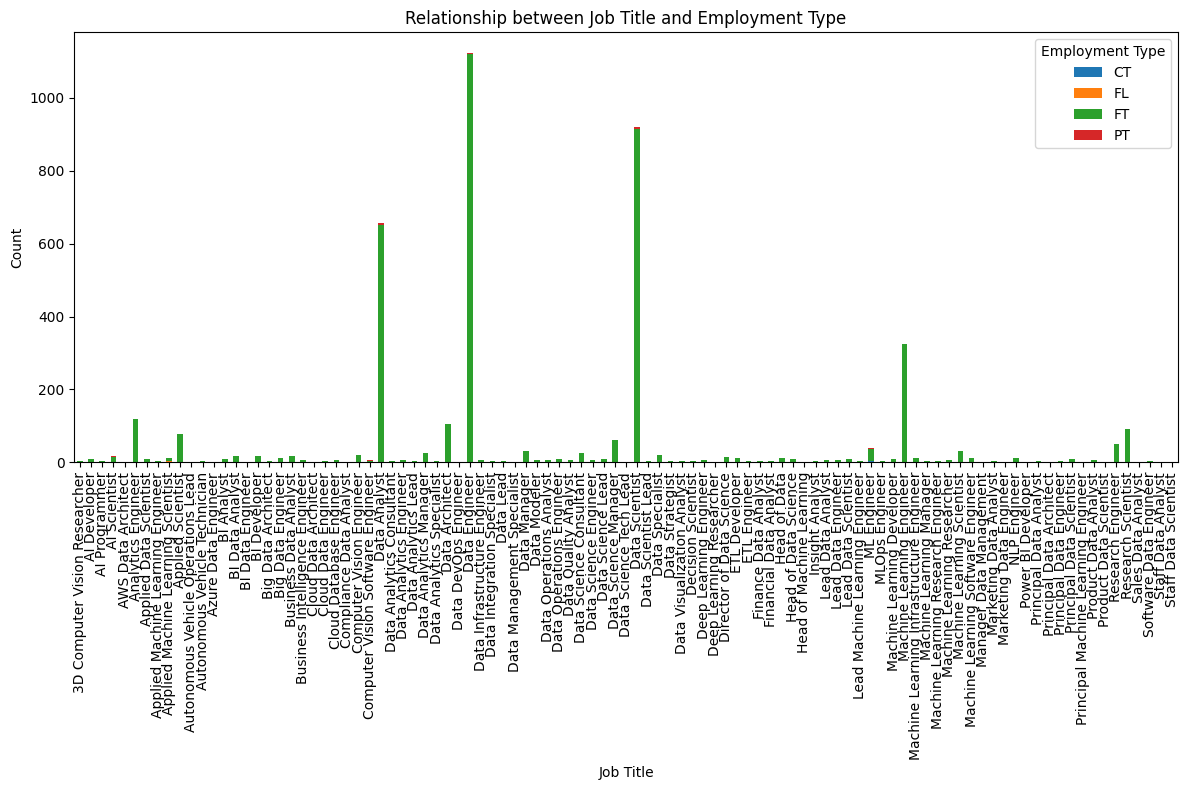

In [88]:
 
grouped_data = df.groupby(['job_title', 'employment_type']).size().unstack()
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
ax.set_title('Relationship between Job Title and Employment Type')
ax.legend(title='Employment Type')
plt.tight_layout()
plt.show()


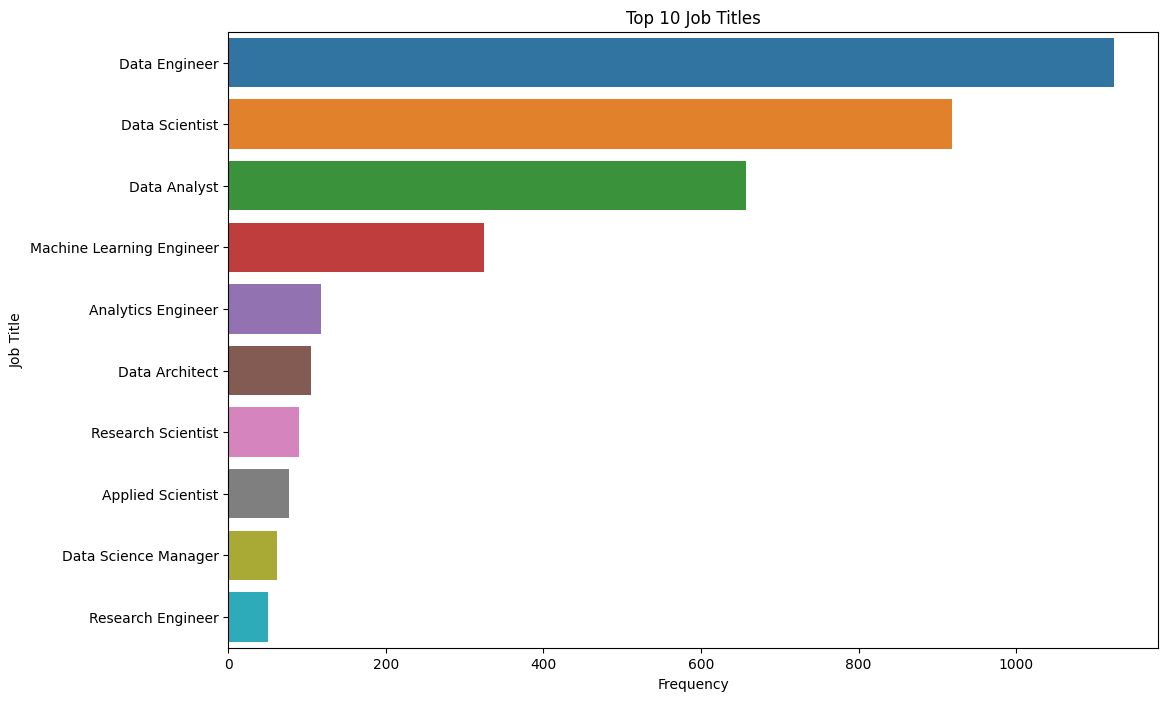

In [89]:
top_10_job_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_job_titles.values, y=top_10_job_titles.index)
plt.title('Top 10 Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


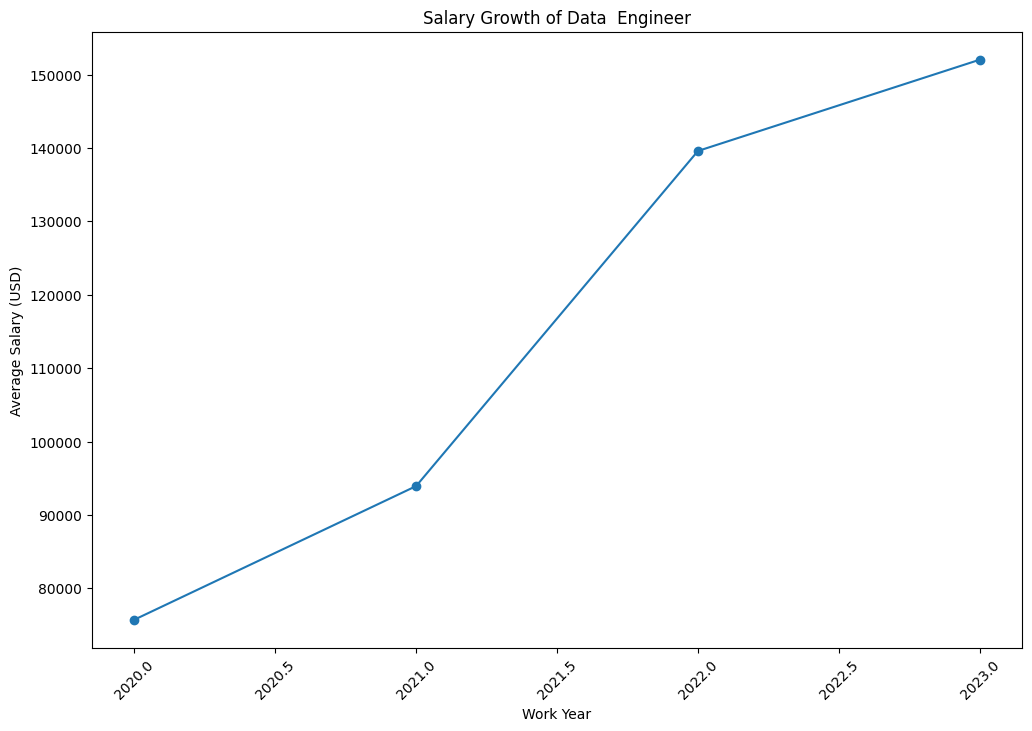

In [90]:
 
Data_Engineer = df[df['job_title'] == 'Data Engineer']
salary_growth = Data_Engineer.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(12, 8))
plt.plot(salary_growth.index, salary_growth.values, marker='o')
plt.title('Salary Growth of Data  Engineer')
plt.xlabel('Work Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()


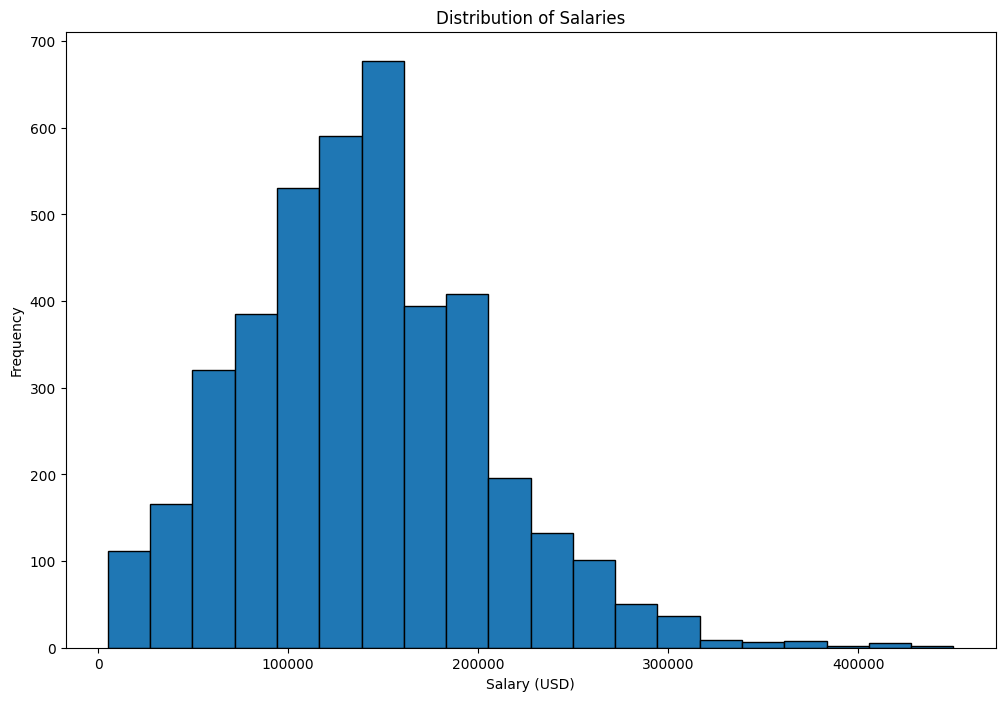

In [91]:
plt.figure(figsize=(12, 8))
plt.hist(df['salary_in_usd'], bins=20, edgecolor='k')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


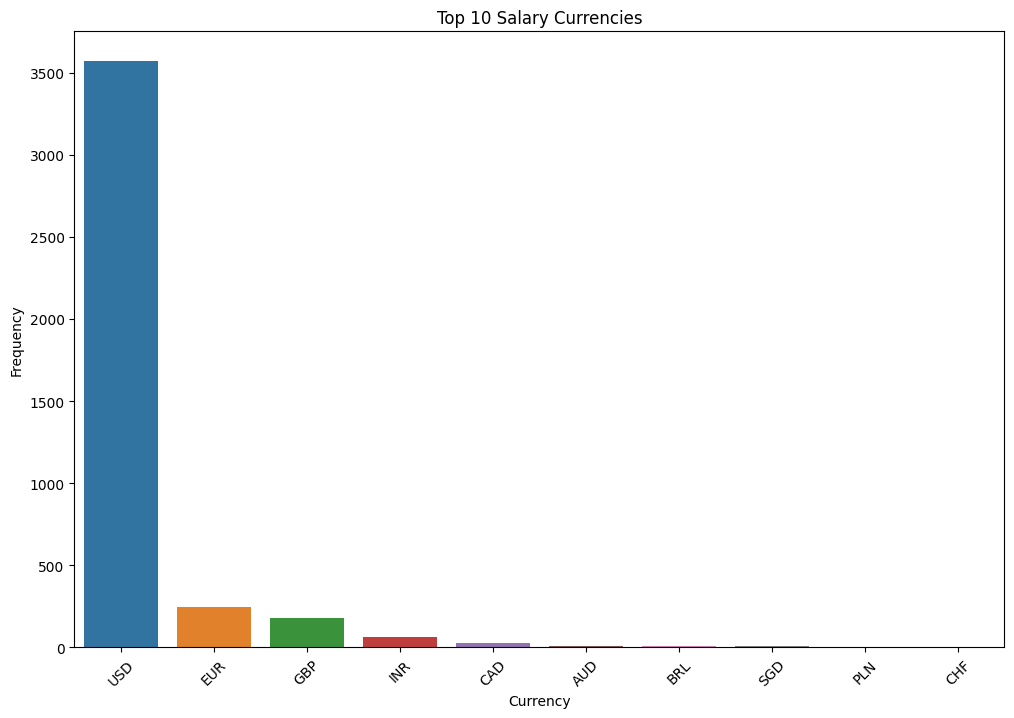

In [92]:
top_10_currency = df['salary_currency'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_currency.index, y=top_10_currency.values)
plt.title('Top 10 Salary Currencies')
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


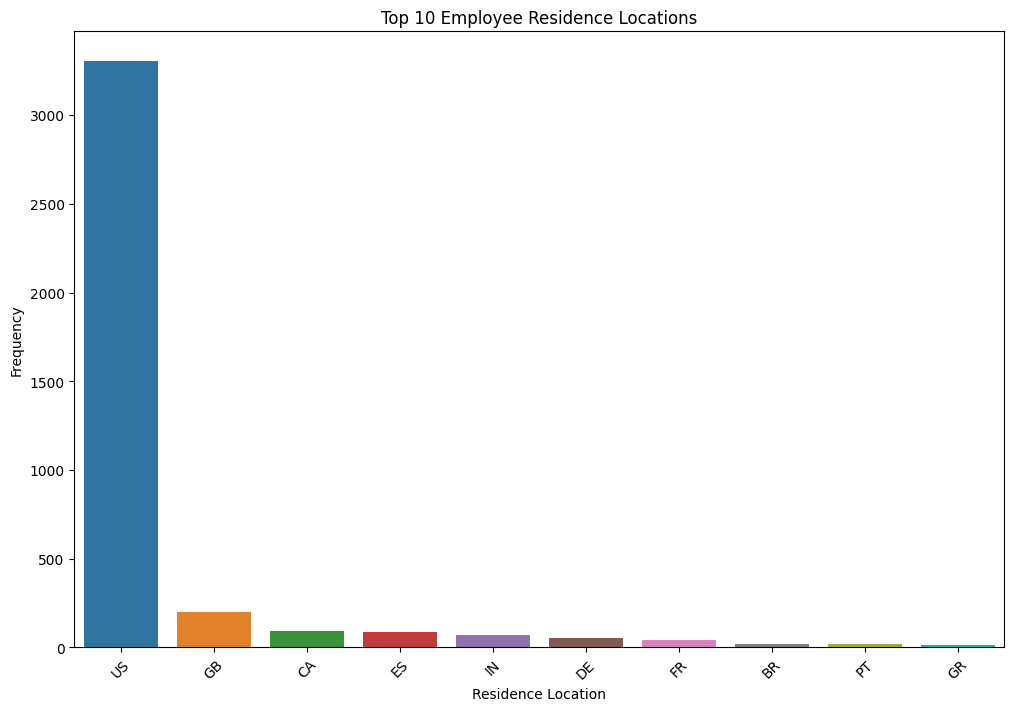

In [93]:
top_10_residence = df['employee_residence'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_residence.index, y=top_10_residence.values)
plt.title('Top 10 Employee Residence Locations')
plt.xlabel('Residence Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


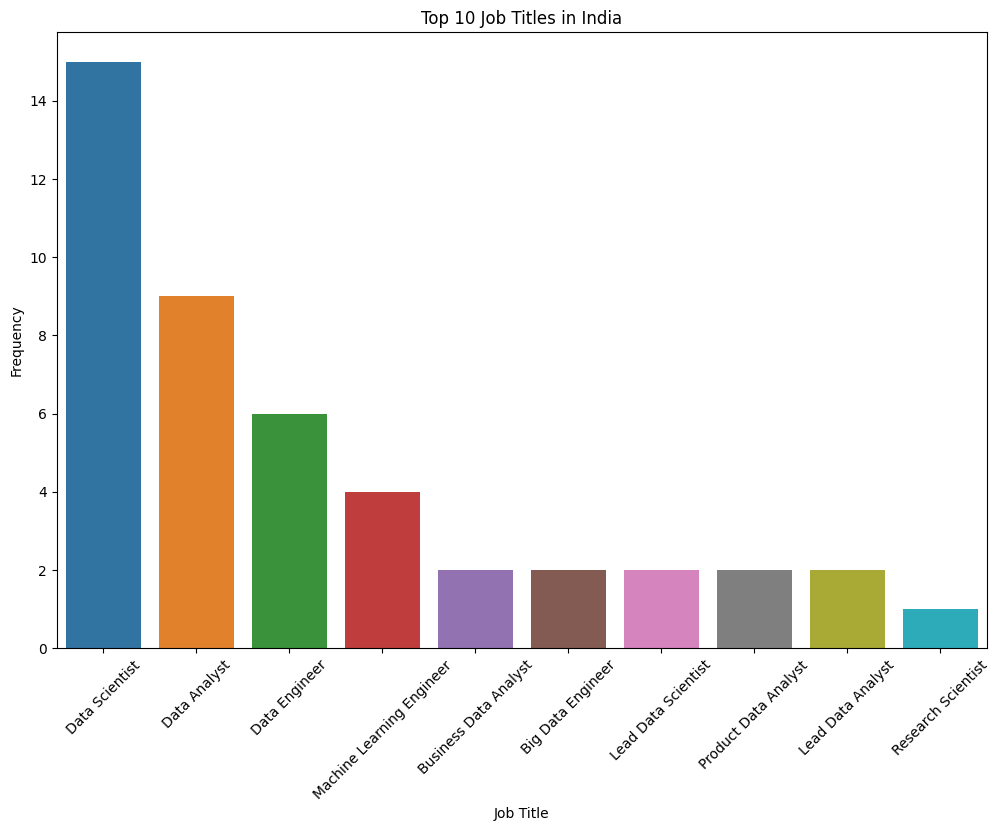

In [94]:
top_10_job_titles_in_india = df.loc[df['company_location'] == 'IN', 'job_title'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_job_titles_in_india.index, y=top_10_job_titles_in_india.values)
plt.title('Top 10 Job Titles in India')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


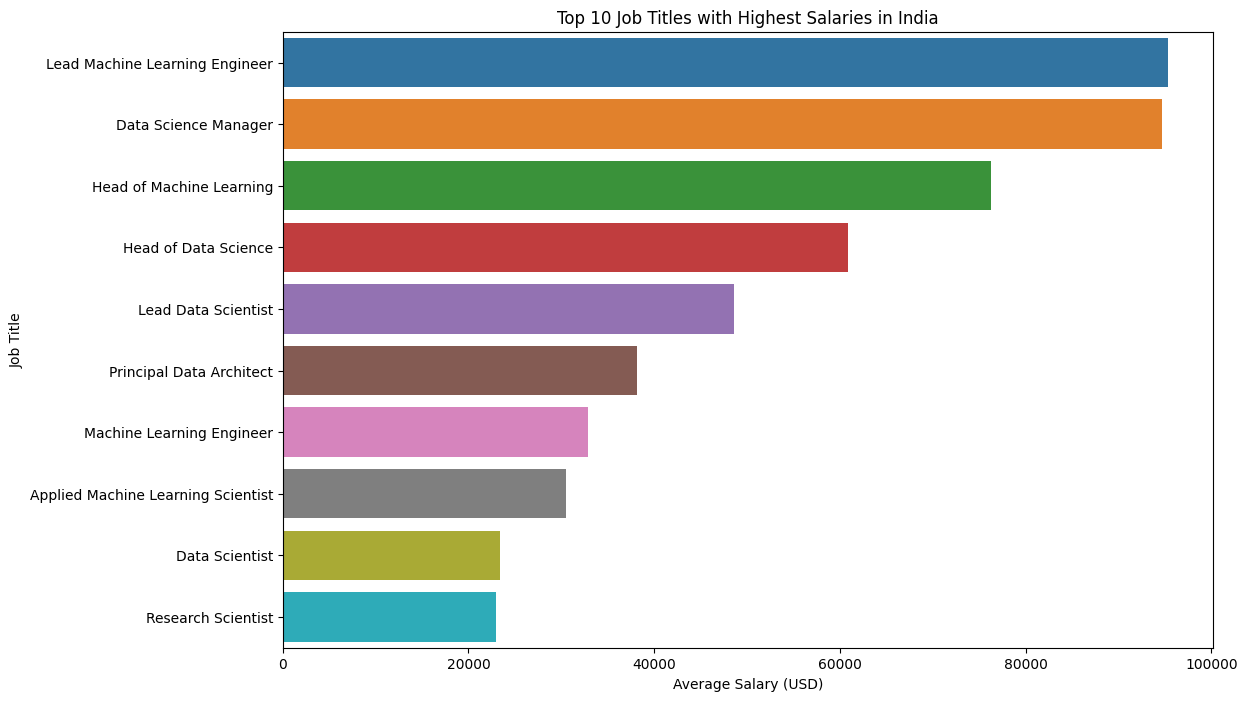

In [95]:
top_10_highest_salary_titles_in_india = df.loc[df['company_location'] == 'IN'].groupby('job_title')['salary_in_usd'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_salary_titles_in_india.values, y=top_10_highest_salary_titles_in_india.index)
plt.title('Top 10 Job Titles with Highest Salaries in India')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()


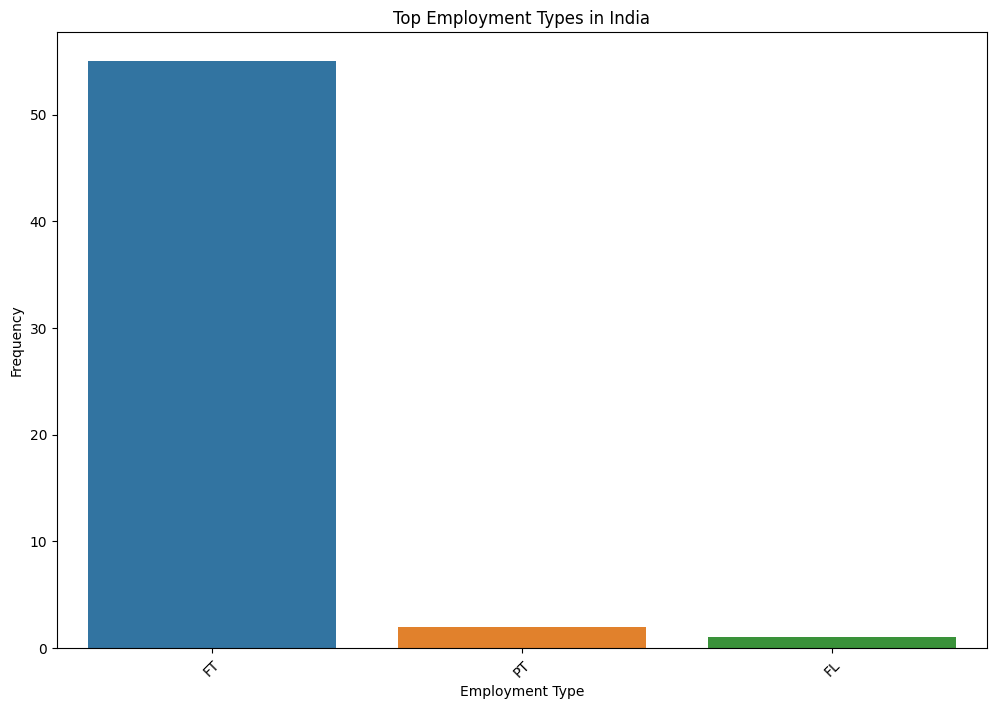

In [96]:
top_10_employment_types_in_india = df.loc[df['company_location'] == 'IN', 'employment_type'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_employment_types_in_india.index, y=top_10_employment_types_in_india.values)
plt.title('Top Employment Types in India')
plt.xlabel('Employment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
